<a href="https://colab.research.google.com/github/andreyprm/Credit-Scoring-Apps/blob/main/Test_ODP_DataScience_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('application_train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

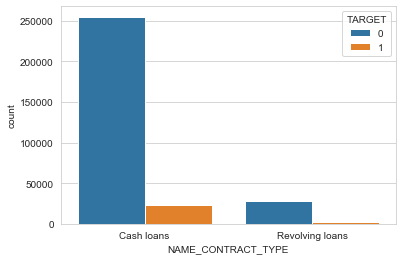

In [ ]:
sns.countplot(df['NAME_CONTRACT_TYPE'], hue=df['TARGET'])

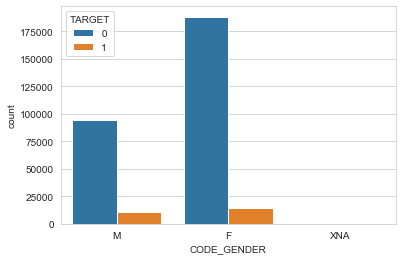

In [ ]:
sns.countplot(df['CODE_GENDER'], hue=df['TARGET'])

In [ ]:
df_x = df.dropna(inplace=True)

In [ ]:
df.groupby(['CODE_GENDER', 'TARGET'])['TARGET'].count()

CODE_GENDER  TARGET
F            0         3997
             1          224
M            0         4079
             1          302
Name: TARGET, dtype: int64

In [ ]:
df.groupby(['NAME_CONTRACT_TYPE', 'TARGET'])['TARGET'].count()

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         7162
                    1          498
Revolving loans     0          914
                    1           28
Name: TARGET, dtype: int64

In [ ]:
df['CODE_GENDER'].value_counts(normalize=True)

M    0.5093
F    0.4907
Name: CODE_GENDER, dtype: float64

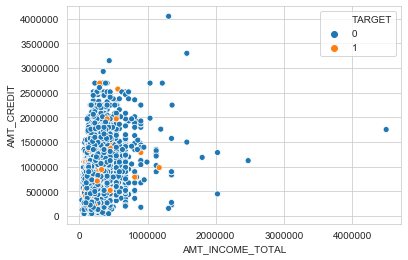

In [ ]:
sns.scatterplot(df['AMT_INCOME_TOTAL'], df['AMT_CREDIT'], hue=df['TARGET'])

In [ ]:
df['TARGET'].value_counts(normalize=True)

0    0.938851
1    0.061149
Name: TARGET, dtype: float64

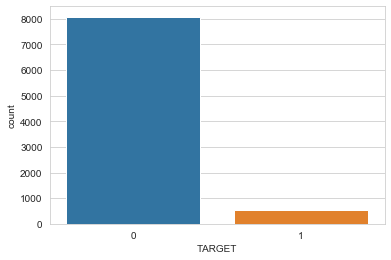

In [ ]:
sns.countplot(df['TARGET'])

In [ ]:
df['TARGET'].value_counts(normalize=True)

0    0.938851
1    0.061149
Name: TARGET, dtype: float64

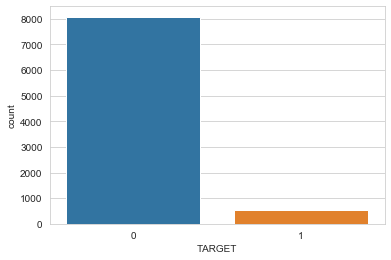

In [ ]:
sns.countplot(df['TARGET'])

## Feature Engineering

In [ ]:
feature = pd.get_dummies(df.drop('TARGET', axis=1), drop_first=True)
target  = df['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=101, test_size=0.3)

## Model Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, recall_score, classification_report, confusion_matrix

In [ ]:
models = [DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, XGBClassifier]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [ ]:
def score_algorithm(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    algorithm = model()
#     
    ros = RandomOverSampler(random_state=101)
#    
    X_ros, y_ros = ros.fit_sample(X_train, y_train)
      
    #evaluation model Random Over Sampling
    algorithm.fit(X_ros, y_ros)
    prediction_ros = algorithm.predict(X_test)
    accuracy_ros =  accuracy_score(y_test, prediction_ros)
    recall_ros = recall_score(y_test, prediction_ros)
    f1_ros = f1_score(y_test,prediction_ros)
    log_ros = log_loss(y_test, prediction_ros)
    
    #evaluation model test
    algorithm = model()
    algorithm.fit(X_train, y_train)
    prediction_test = algorithm.predict(X_test)
    accuracy_test =  accuracy_score(y_test, prediction_test)
    recall_test = recall_score(y_test, prediction_test)
    f1_test = f1_score(y_test,prediction_test)
    log_test = log_loss(y_test, prediction_test)
        
    all_score = [ accuracy_test, recall_test, f1_test, log_test, accuracy_ros, recall_ros, f1_ros, log_ros]
    return all_score

In [ ]:
score_all = []
for i in models:
    skor = score_algorithm(feature, target, i)
    score_all.append(skor)

In [ ]:
df_score = pd.DataFrame(score_all, columns = ['Accuracy_real','Recall_real', 'F1_real', 'LogLoss_real', 'Accuracy_ROS', 'Recall_ROS', 'F1_ROS', 'LogLoss_ROS'], index=['DecisionTreeClassifier', 'RandomForestClassifier', 'KNNeighbors', 'XGBClassifier'])
df_score

,Accuracy_real,Recall_real,F1_real,LogLoss_real,Accuracy_ROS,Recall_ROS,F1_ROS,LogLoss_ROS
DecisionTreeClassifier,0.886113,0.16,0.140351,3.933579,0.884370,0.09,0.082949,3.993784
RandomForestClassifier,0.941894,0.00,0.000000,2.006902,0.941894,0.00,0.000000,2.006902
KNNeighbors,0.936665,0.00,0.000000,2.187527,0.787914,0.22,0.107579,7.325324
XGBClassifier,0.941894,0.04,0.074074,2.006903,0.931435,0.05,0.078125,2.368155


## Modelling with XGB & Random Over Sampling

In [ ]:
model = XGBClassifier()

In [ ]:
ros = RandomOverSampler(random_state=101)
X_ros, y_ros = ros.fit_sample(X_train, y_train)

In [ ]:
model.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [ ]:
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2418
           1       0.21      0.05      0.08       163

    accuracy                           0.93      2581
   macro avg       0.57      0.52      0.52      2581
weighted avg       0.89      0.93      0.91      2581



In [ ]:
print(confusion_matrix(y_test, prediction))

[[2387   31]
 [ 155    8]]


## AUC ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
probs = model.predict_proba(X_test)
probs

array([[3.3062422e-01, 6.6937578e-01],
       [9.8810536e-01, 1.1894655e-02],
       [9.6748102e-01, 3.2518983e-02],
       ...,
       [9.2183512e-01, 7.8164876e-02],
       [9.9997258e-01, 2.7408052e-05],
       [9.8638123e-01, 1.3618778e-02]], dtype=float32)

In [ ]:
probability = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probability, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc

0.6211161686127054

Text(0, 0.5, 'True Positive Rate')

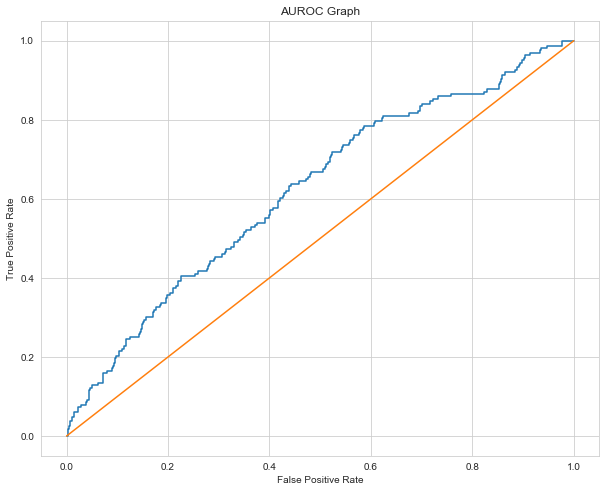

In [ ]:
plt.figure(figsize=(10,8))
plt.title('AUROC Graph')
plt.plot(fpr, tpr, label='AUC : {}'.format(round(roc_auc,2)))
plt.plot([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


## Feature Importance

In [ ]:
df_feature = pd.DataFrame(columns=['Feature','Importance'])
df_feature['Feature'] = feature.columns
df_feature['Importance'] = model.feature_importances_

In [ ]:
df_feature.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
67,FLOORSMIN_MEDI,0.039260
142,OCCUPATION_TYPE_Sales staff,0.029514
136,OCCUPATION_TYPE_Laborers,0.026351
23,REG_REGION_NOT_WORK_REGION,0.024100
62,YEARS_BUILD_MEDI,0.018441
30,EXT_SOURCE_3,0.017412
184,ORGANIZATION_TYPE_Police,0.016465
28,EXT_SOURCE_1,0.015401
158,ORGANIZATION_TYPE_Construction,0.014867
19,REGION_RATING_CLIENT,0.014699


## Scoring with KFold

In [ ]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.61060


In [ ]:
scores

array([0.69154108, 0.5668905 , 0.58626033, 0.65160124, 0.60227273,
       0.53719008, 0.64695248, 0.68491736, 0.59751037, 0.62045399,
       0.64244045, 0.66477273, 0.56844008, 0.57334711, 0.62913223,
       0.5777376 , 0.59529959, 0.61002066, 0.49328777, 0.67195509])

## Best Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_test, y_test)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.633633 using {'scale_pos_weight': 1}
0.633633 (0.057418) with: {'scale_pos_weight': 1}
0.620263 (0.065687) with: {'scale_pos_weight': 10}
0.616811 (0.053772) with: {'scale_pos_weight': 25}
0.623464 (0.062051) with: {'scale_pos_weight': 50}
0.617330 (0.055778) with: {'scale_pos_weight': 75}
0.613987 (0.054576) with: {'scale_pos_weight': 99}
0.616019 (0.051728) with: {'scale_pos_weight': 100}
0.614713 (0.056581) with: {'scale_pos_weight': 1000}


## Predict Test Data

In [ ]:
test_data = pd.read_csv('application_test.csv')

In [ ]:
test_feature = pd.get_dummies(test_data, drop_first=True)

In [ ]:
test_feature.drop(['ORGANIZATION_TYPE_XNA', 'ORGANIZATION_TYPE_Industry: type 13', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Student', 'ORGANIZATION_TYPE_Trade: type 5', 'NAME_INCOME_TYPE_Pensioner', 'FLAG_OWN_CAR_Y', 'NAME_INCOME_TYPE_Commercial associate'], axis=1, inplace=True)

In [ ]:
model = XGBClassifier()
model.fit(X_ros, y_ros)
model.predict(test_feature)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
probs_test = model.predict_proba(test_feature)
probs_test [:,1]

array([0.00042965, 0.00774097, 0.0005078 , ..., 0.00671457, 0.02329125,
       0.0246407 ], dtype=float32)

In [ ]:
test_proba = pd.DataFrame(columns=['SK_ID_CURR','TARGET'])
test_proba['SK_ID_CURR'] = test_feature['SK_ID_CURR']
test_proba['TARGET'] = probs_test [:,1]

In [ ]:
test_proba.head(20)

,SK_ID_CURR,TARGET
0,100001,0.000430
1,100005,0.007741
2,100013,0.000508
3,100028,0.000094
4,100038,0.230406
5,100042,0.002728
6,100057,0.000182
7,100065,0.001835
8,100066,0.000007
9,100067,0.213522


In [ ]:
df.corr().sort_values(by='TARGET').head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
EXT_SOURCE_3,-0.021735,-0.150720,0.007518,-0.055892,0.043173,0.026225,0.047933,-0.043639,-0.141725,-0.146613,...,-0.010891,0.012193,-0.017747,0.012004,-0.008458,-0.013873,-0.048512,-0.019912,-0.005306,-0.083842
EXT_SOURCE_2,0.005443,-0.130969,0.006046,0.132702,0.116727,0.102212,0.121168,0.229401,-0.157443,-0.095232,...,0.006978,0.004169,0.012367,0.011411,-0.012738,-0.007720,-0.004214,0.046123,-0.001055,-0.046502
EXT_SOURCE_1,-0.006206,-0.129548,-0.068846,0.128865,0.187568,0.164067,0.197046,0.141609,-0.516537,-0.213427,...,0.006547,0.015367,0.000952,-0.021865,0.003063,-0.015408,0.024279,0.035694,0.005071,-0.011890
FLOORSMAX_AVG,-0.015395,-0.046110,-0.007317,0.197994,0.095920,0.130151,0.103576,0.319260,-0.046301,0.010997,...,0.025249,0.013751,0.007291,0.006544,0.034566,-0.003370,0.009122,0.064852,0.000644,-0.043777
FLOORSMAX_MODE,-0.015842,-0.045990,-0.006046,0.191779,0.095460,0.128004,0.102786,0.302405,-0.041554,0.008961,...,0.025290,0.014651,0.008455,0.007104,0.035775,-0.004019,0.011251,0.061879,0.001600,-0.042853
FLOORSMAX_MEDI,-0.014036,-0.045206,-0.006788,0.196860,0.095669,0.129675,0.103552,0.315434,-0.045896,0.010550,...,0.025874,0.013725,0.007320,0.006540,0.035094,-0.003440,0.010601,0.064719,0.001889,-0.044619
AMT_INCOME_TOTAL,-0.011396,-0.039762,-0.023069,1.000000,0.348575,0.415807,0.354556,0.211133,-0.119206,-0.028260,...,0.041473,0.010493,0.003233,0.031045,0.026559,-0.001641,0.024093,0.024042,0.006707,-0.007158
FLOORSMIN_MEDI,-0.005140,-0.033313,-0.010298,0.125193,0.071373,0.096311,0.075660,0.268459,-0.034827,0.010019,...,0.019780,0.019625,0.010704,0.010459,0.033596,-0.003944,0.010155,0.054801,0.002450,-0.036930
FLOORSMIN_AVG,-0.006386,-0.032904,-0.011956,0.126338,0.071738,0.097323,0.076024,0.272141,-0.035261,0.010425,...,0.019955,0.019663,0.010684,0.010474,0.035143,-0.003989,0.008318,0.054496,0.001071,-0.037225
FLOORSMIN_MODE,-0.006742,-0.031688,-0.008815,0.118840,0.068033,0.092985,0.071870,0.252610,-0.031858,0.009889,...,0.018073,0.020310,0.011569,0.010885,0.029281,-0.006427,0.009405,0.047685,0.004380,-0.034951


In [ ]:
df.corr().sort_values(by='TARGET', ascending=False).head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,0.015474,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,-0.021225,0.041108,0.062950,...,-0.006139,0.013976,-0.008259,-0.003892,0.012156,0.014616,0.015000,-0.004202,0.016465,0.033832
DAYS_EMPLOYED,-0.011304,0.062950,0.014600,-0.028260,-0.068760,-0.058623,-0.071172,0.004597,0.325117,1.000000,...,0.014636,0.014895,0.018351,0.001814,-0.001194,0.025302,0.004644,-0.014233,0.025230,-0.007192
REGION_RATING_CLIENT_W_CITY,-0.003637,0.061214,0.018380,-0.220782,-0.112522,-0.142749,-0.112101,-0.569545,0.044376,-0.013937,...,-0.011761,-0.006496,0.009604,-0.012433,-0.012010,-0.011832,-0.008654,-0.060312,0.035933,0.047404
FLAG_DOCUMENT_3,-0.017875,0.054269,0.009947,-0.098321,0.076155,0.056177,0.054159,-0.153716,-0.013433,-0.028240,...,-0.012787,0.007421,0.008448,-0.020946,0.013618,0.011923,0.029727,0.000599,0.028691,0.043488
REGION_RATING_CLIENT,-0.003452,0.053614,0.015053,-0.207276,-0.108125,-0.131777,-0.108693,-0.595022,0.042951,-0.029713,...,-0.007073,-0.008745,0.006085,-0.013628,-0.011263,-0.011292,-0.013445,-0.064634,0.027296,0.048630
DAYS_BIRTH,0.006310,0.041108,0.175747,-0.119206,-0.198152,-0.151530,-0.198316,-0.060821,1.000000,0.325117,...,0.011746,0.002631,-0.002663,0.019658,0.009544,0.018687,0.003329,-0.036862,-0.014376,-0.047330
AMT_REQ_CREDIT_BUREAU_YEAR,-0.017236,0.033832,-0.035499,-0.007158,-0.057768,-0.004702,-0.061785,-0.035349,-0.047330,-0.007192,...,-0.051322,-0.004909,-0.007816,-0.002236,-0.008433,0.003018,0.024866,-0.010767,0.088951,1.000000
OBS_30_CNT_SOCIAL_CIRCLE,0.005568,0.031041,0.008031,-0.063613,-0.026006,-0.040282,-0.027548,-0.050619,0.050040,0.007849,...,0.000688,-0.008341,0.007579,-0.009392,-0.000287,-0.016297,0.017086,-0.002827,0.001656,0.045845
OBS_60_CNT_SOCIAL_CIRCLE,0.005495,0.030730,0.007668,-0.063459,-0.025458,-0.039380,-0.027053,-0.050523,0.049631,0.007630,...,0.000899,-0.008228,0.007875,-0.009353,0.000260,-0.017071,0.017579,-0.002784,0.000244,0.046538
OWN_CAR_AGE,0.000611,0.028052,0.008337,-0.120090,-0.078948,-0.090073,-0.086201,-0.083134,0.030548,0.020314,...,-0.003889,-0.010158,-0.016241,-0.002735,0.003118,-0.001610,-0.008410,0.001274,-0.029005,-0.022072
